In [3]:
import db.knowhere_db as kdb
import pipeline.pipeline as pipeline
import pandas as pd
import numpy as np
from time import time
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.stats import randint as sp_randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn import linear_model
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from mlxtend.classifier import StackingClassifier
from mlxtend.classifier import StackingCVClassifier
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from itertools import cycle
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score
from scipy import interp

In [4]:
glen_H_data_raw = pd.read_csv("Labeled_glen_2017-03-19_to_2017-03-23_simplified.csv", index_col=0)

In [564]:
#glen_H_data = glen_H_data_raw[['Acceleration x','Acceleration y','Acceleration z', 'Altimeter (Barometer) Pressure',\
#                               'Microphone Left Channel Level', 'Microphone Right Channel Level','Magnetometer x',\
#                               'Magnetometer y','Magnetometer z','Gyrometer x','Gyrometer y',\
#                               'Gyrometer z', 'classification']]
#glen_H_data = glen_H_data.dropna()
#glen_H_data.iloc[:,0:11].astype(float)

In [5]:
glen_H_data = glen_H_data_raw[['Acceleration x','Acceleration y','Acceleration z',
                               'Magnetometer x','Magnetometer y','Magnetometer z',\
                               'classification']]
#glen_H_data = glen_H_data.dropna()#glen_H_data = glen_H_data.dropna()
glen_H_data.iloc[:,0:6].astype(float)

,Acceleration x,Acceleration y,Acceleration z,Magnetometer x,Magnetometer y,Magnetometer z
2017-03-20 07:33:32,NaN,NaN,NaN,NaN,NaN,NaN
2017-03-20 07:33:33,-0.152821,0.563072,-1.372254,-53.052246,138.553955,-448.443573
2017-03-20 07:33:37,0.377050,0.415137,-0.714468,-53.052246,138.553955,-448.443573
2017-03-20 07:33:42,0.012040,0.095826,-0.189779,-50.648590,118.981277,-439.615295
2017-03-20 07:33:46,0.133631,-0.102296,0.194141,-63.697037,115.890854,-440.596222
2017-03-20 07:33:51,-0.046038,0.116571,0.066937,-103.700851,121.900009,-432.912354
2017-03-20 07:33:55,-0.107973,-0.140334,-0.182697,-89.450562,134.090012,-446.808716
2017-03-20 07:34:00,-0.045027,0.000996,-0.009279,-48.244934,139.584091,-442.558044
2017-03-20 07:34:04,0.091546,-0.424249,-0.222485,-48.244934,139.584091,-442.558044
2017-03-20 07:34:09,-0.001429,0.000199,-0.218771,-54.940842,146.280014,-448.280090


In [6]:
#glen_H_data = glen_H_data.replace(to_replace='T_E', value='T_S')
glen_H_data.groupby("classification").size()

classification
D      1107
E        59
S       418
T_D    2107
T_S     435
W      2055
dtype: int64

In [7]:
glen_H_data['Acceleration'] =  np.sqrt(glen_H_data['Acceleration x']**2 + glen_H_data['Acceleration y']**2 +\
                                       glen_H_data['Acceleration z']**2)
glen_H_data['Magnetometer'] =  np.sqrt(glen_H_data['Magnetometer x']**2 + glen_H_data['Magnetometer y']**2 +\
                                       glen_H_data['Magnetometer z']**2)
#glen_H_data['Gyrometer']    =  np.sqrt(glen_H_data['Gyrometer x']**2 + glen_H_data['Gyrometer y']**2 +\
#                                       glen_H_data['Gyrometer z']**2)
#glen_H_data['Microphone']    =  (glen_H_data['Microphone Left Channel Level'] +\
#                                glen_H_data['Microphone Right Channel Level'])/2
#glen_H_data = glen_H_data[['Acceleration','Magnetometer','Gyrometer','Microphone','Altimeter (Barometer) Pressure', 'classification']]
glen_H_data = glen_H_data[['Acceleration', 'Magnetometer', 'classification']]
glen_H_data

/Users/gafergus/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/gafergus/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,Acceleration,Magnetometer,classification
2017-03-20 07:33:32,NaN,NaN,NaN
2017-03-20 07:33:33,1.491135,472.348788,D
2017-03-20 07:33:37,0.908279,472.348788,D
2017-03-20 07:33:42,0.212940,458.239492,D
2017-03-20 07:33:46,0.256929,460.014166,D
2017-03-20 07:33:51,0.142088,461.548031,D
2017-03-20 07:33:55,0.254421,474.994276,D
2017-03-20 07:34:00,0.045984,466.550013,D
2017-03-20 07:34:04,0.487717,466.550013,D
2017-03-20 07:34:09,0.218776,474.732954,D


In [8]:
# set window 1
window = 2
# Rolling Means
glen_H_data['RollingMeanAcceleration2'] = glen_H_data['Acceleration'].rolling(window=window,center=False).mean()
glen_H_data['RollingMeanMagnetometer2'] = glen_H_data['Magnetometer'].rolling(window=window,center=False).mean()
# Rolling st dev
glen_H_data['RollingSDAcceleration2'] = glen_H_data['Acceleration'].rolling(window=window,center=False).std()
glen_H_data['RollingSDMagnetometer2'] = glen_H_data['Magnetometer'].rolling(window=window,center=False).std()

# set window 2
window = 5
# Rolling Means
glen_H_data['RollingMeanAcceleration5'] = glen_H_data['Acceleration'].rolling(window=window,center=False).mean()
glen_H_data['RollingMeanMagnetometer5'] = glen_H_data['Magnetometer'].rolling(window=window,center=False).mean()
# Rolling st dev
glen_H_data['RollingSDAcceleration5'] = glen_H_data['Acceleration'].rolling(window=window,center=False).std()
glen_H_data['RollingSDMagnetometer5'] = glen_H_data['Magnetometer'].rolling(window=window,center=False).std()

# set window 1
window = 7
# Rolling Means
glen_H_data['RollingMeanAcceleration7'] = glen_H_data['Acceleration'].rolling(window=window,center=False).mean()
glen_H_data['RollingMeanMagnetometer7'] = glen_H_data['Magnetometer'].rolling(window=window,center=False).mean()
# Rolling st dev
glen_H_data['RollingSDAcceleration7'] = glen_H_data['Acceleration'].rolling(window=window,center=False).std()
glen_H_data['RollingSDMagnetometer7'] = glen_H_data['Magnetometer'].rolling(window=window,center=False).std()

# set window 2
window = 10
# Rolling Means
glen_H_data['RollingMeanAcceleration10'] = glen_H_data['Acceleration'].rolling(window=window,center=False).mean()
glen_H_data['RollingMeanMagnetometer10'] = glen_H_data['Magnetometer'].rolling(window=window,center=False).mean()
# Rolling st dev
glen_H_data['RollingSDAcceleration10'] = glen_H_data['Acceleration'].rolling(window=window,center=False).std()
glen_H_data['RollingSDMagnetometer10'] = glen_H_data['Magnetometer'].rolling(window=window,center=False).std()

# set window 3
window = 15
# Rolling Means
glen_H_data['RollingMeanAcceleration15'] = glen_H_data['Acceleration'].rolling(window=window,center=False).mean()
glen_H_data['RollingMeanMagnetometer15'] = glen_H_data['Magnetometer'].rolling(window=window,center=False).mean()
# Rolling st dev
glen_H_data['RollingSDAcceleration15'] = glen_H_data['Acceleration'].rolling(window=window,center=False).std()
glen_H_data['RollingSDMagnetometer15'] = glen_H_data['Magnetometer'].rolling(window=window,center=False).std()

In [9]:
glen_H_data = glen_H_data.dropna()
#glen_H_data_re = glen_H_data.iloc[:,range(0,5) + range(6,35) + [5]]
glen_H_data_re = glen_H_data.iloc[:,range(0,2) + range(3,23) + [2]]

In [20]:
# load dataset
dataset = glen_H_data_re.values
X = dataset[:,0:21]
Y = dataset[:,22]
#X, Y = shuffle(X, Y, random_state=123)
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)


In [11]:
glen_H_data_re.groupby("classification").size()

classification
D      1093
E        59
S       418
T_D    2107
T_S     435
W      2055
dtype: int64

In [12]:
KNN = KNeighborsClassifier(n_neighbors=3)
lr = LogisticRegression()
NN = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
#RF_Class = RandomForestClassifier(n_estimators=1000)
GBM = GradientBoostingClassifier(n_estimators=1000)

In [649]:
# build a classifier
RF_Class = RandomForestClassifier(n_estimators=200)
# Utility function to report best scores
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")


# specify parameters and distributions to sample from
param_dist = {"max_depth": [2, 3, 2, 10, 13, 27, None],
              "max_features": sp_randint(1,21),
              "min_samples_split": sp_randint(2, 100),
              "min_samples_leaf": sp_randint(1, 100),
              "bootstrap": [True],
              "criterion": ["gini"]}

# run randomized search
n_iter_search = 25
random_search = RandomizedSearchCV(RF_Class, param_distributions=param_dist, n_iter=n_iter_search)

start = time()
random_search.fit(X, Y)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time() - start), n_iter_search))
report(random_search.cv_results_)

RandomizedSearchCV took 316.71 seconds for 25 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.811 (std: 0.003)
Parameters: {'bootstrap': True, 'min_samples_leaf': 16, 'min_samples_split': 80, 'criterion': 'gini', 'max_features': 11, 'max_depth': None}

Model with rank: 2
Mean validation score: 0.803 (std: 0.008)
Parameters: {'bootstrap': True, 'min_samples_leaf': 14, 'min_samples_split': 82, 'criterion': 'gini', 'max_features': 20, 'max_depth': 27}

Model with rank: 3
Mean validation score: 0.800 (std: 0.002)
Parameters: {'bootstrap': True, 'min_samples_leaf': 41, 'min_samples_split': 32, 'criterion': 'gini', 'max_features': 10, 'max_depth': 27}



In [13]:
RF_Class = RandomForestClassifier(bootstrap=True,min_samples_leaf=16,n_estimators=1500,\
                                  min_samples_split=80, criterion='gini', max_features=11, max_depth=None)

In [14]:
RF_Class.fit(X, encoded_Y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=11, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=16,
            min_samples_split=80, min_weight_fraction_leaf=0.0,
            n_estimators=1500, n_jobs=1, oob_score=False,
            random_state=None, verbose=0, warm_start=False)

Feature ranking:
1. feature 18 (0.197520)
2. feature 17 (0.131438)
3. feature 14 (0.110122)
4. feature 13 (0.075347)
5. feature 10 (0.057233)
6. feature 6 (0.055421)
7. feature 9 (0.054514)
8. feature 19 (0.043030)
9. feature 15 (0.040357)
10. feature 11 (0.038368)
11. feature 7 (0.036390)
12. feature 20 (0.029726)
13. feature 3 (0.029267)
14. feature 16 (0.026476)
15. feature 1 (0.024053)
16. feature 2 (0.020541)
17. feature 12 (0.013990)
18. feature 8 (0.008878)
19. feature 0 (0.004393)
20. feature 5 (0.001729)
21. feature 4 (0.001207)


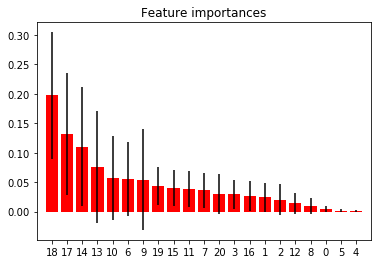

In [652]:
importances = RF_Class.feature_importances_
std = np.std([tree.feature_importances_ for tree in RF_Class.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [15]:
x_train,x_test, y_train, y_test = train_test_split(X, encoded_Y, test_size=0.33, random_state=41010392)
RFY_Pred = RF_Class.predict(x_test)
print accuracy_score(y_test,RFY_Pred)
print confusion_matrix(y_test,RFY_Pred)

0.853143418468
[[287   0   1  22   0  61]
 [  1   0   0   0   0  25]
 [ 16   0  97  12   0  18]
 [  5   0   2 674   5  13]
 [  1   0   0  71  69  17]
 [  9   0   2  18   0 610]]


In [308]:
stacked_class = StackingCVClassifier(classifiers= [GBM, RF_Class], 
#                                     use_probas=True,
                                     meta_classifier=lr)
print('5-fold cross validation:\n')

for clf, label in zip([GBM, RF_Class, stacked_class], 
                      ['GBM',
                       'RF_Class',
                       'StackingClassifier']):


    scores = model_selection.cross_val_score(clf, X, encoded_Y, cv=5, scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" 
          % (scores.mean(), scores.std(), label))

5-fold cross validation:



KeyboardInterrupt: 

In [478]:
#GBM.fit(X, Y)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=1000, presort='auto', random_state=None,
              subsample=1.0, verbose=0, warm_start=False)

In [661]:
x_train,x_test, y_train, y_test = train_test_split(X, encoded_Y, test_size=0.33, random_state=41010392)
GBM.fit(x_train, y_train)
Y_pred = GBM.predict(x_test)

In [662]:
print accuracy_score(y_test,Y_pred)
print confusion_matrix(y_test,Y_pred)

0.897838899804
[[322   0   2  12   2  33]
 [  0   5   0   2   0  19]
 [  8   0 116   7   0  12]
 [  2   0   2 673  14   8]
 [  2   0   0  49  94  13]
 [  9   1   1   9   1 618]]


In [29]:
# Binarize the output
Y = label_binarize(encoded_Y, classes=[0, 1, 2, 3, 4, 5])
n_classes = Y.shape[1]
print Y
#x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=.7, random_state=0)

[[1 0 0 0 0 0]
 [1 0 0 0 0 0]
 [1 0 0 0 0 0]
 ..., 
 [0 0 0 0 0 1]
 [0 0 0 0 0 1]
 [0 0 0 0 0 1]]


In [318]:
#classifier = OneVsRestClassifier(GradientBoostingClassifier(n_estimators=1000))
classifier = OneVsRestClassifier(GBM)
classifier.fit(x_train, y_train)
Y_pred = classifier.predict_proba(x_test)

In [23]:
RFY_Pred = RF_Class.predict_proba(X)

In [28]:
print RFY_Pred
print Y_pred

[[ 0.13242478  0.00901558  0.03301645  0.00728428  0.01124739  0.80701151]
 [ 0.21749145  0.01000226  0.0234813   0.01320071  0.03078895  0.70503533]
 [ 0.19354152  0.00925707  0.03851147  0.00331706  0.02394375  0.73142913]
 ..., 
 [ 0.03100875  0.          0.72092469  0.00323879  0.          0.24482777]
 [ 0.03083291  0.          0.7233989   0.00322461  0.          0.24254357]
 [ 0.39019826  0.          0.16906189  0.12502778  0.00710796  0.30860411]]


NameError: name 'Y_pred' is not defined

In [30]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(Y[:, i], RFY_Pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

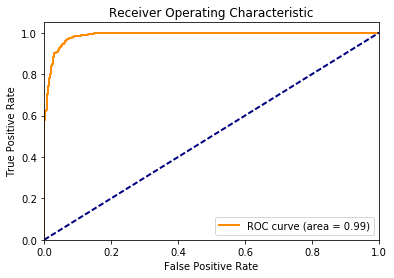

In [32]:
# Compute micro-average ROC curve and ROC area
lw=2
fpr["micro"], tpr["micro"], _ = roc_curve(Y.ravel(), RFY_Pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
plt.figure()
plt.plot(fpr[2], tpr[2], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")



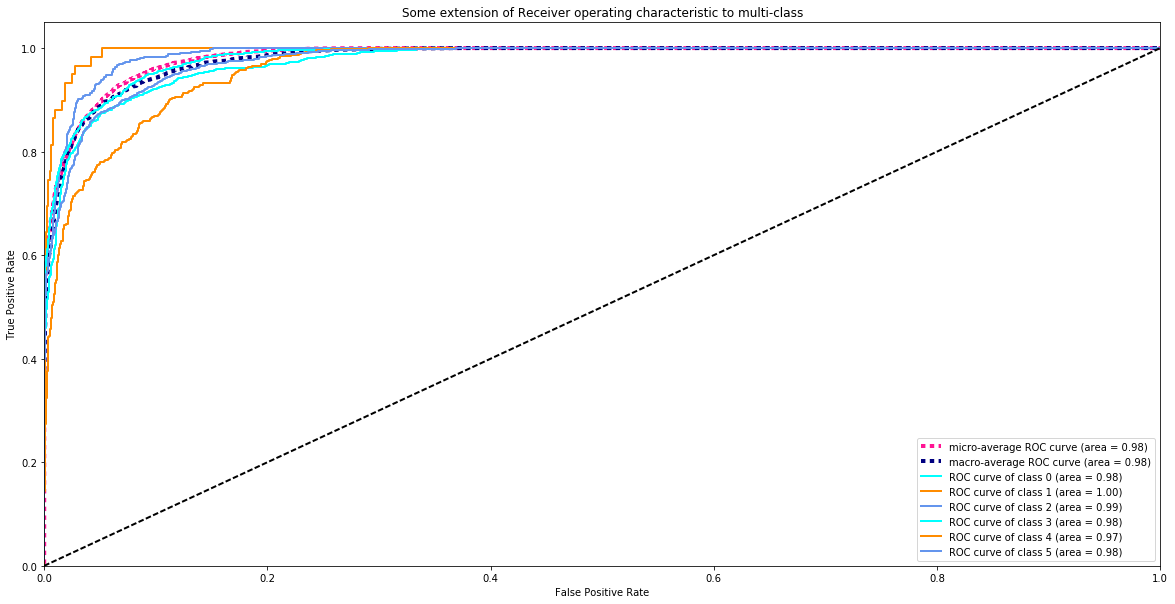

In [33]:
# Compute macro-average ROC curve and ROC area
lw = 2
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])
# Finally average it and compute AUC
mean_tpr /= n_classes
fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(figsize=(20,10))
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)
plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)
colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

In [675]:
glen_H_data_TEST_raw = pd.read_csv('glen_3_24_labeled.csv', index_col=0)
#Use this cell if you want to simplify your labels
glen_H_data_TEST_raw = glen_H_data_TEST_raw.replace(to_replace='T_E', value='T_S')
glen_H_data_TEST_raw = glen_H_data_TEST_raw.replace(to_replace='E_U', value='E')
glen_H_data_TEST_raw = glen_H_data_TEST_raw.replace(to_replace='E_D', value='E')
glen_H_data_TEST_raw = glen_H_data_TEST_raw.replace(to_replace='S_U', value='W')
glen_H_data_TEST_raw = glen_H_data_TEST_raw.replace(to_replace='S_D', value='W')
glen_H_data_TEST_raw = glen_H_data_TEST_raw.replace(to_replace='T_T', value='T_S')
glen_H_data_TEST_raw = glen_H_data_TEST_raw.replace(to_replace='T_B', value='T_D')
glen_H_data_TEST_raw = glen_H_data_TEST_raw.replace(to_replace='P_W', value='W')
glen_H_data_TEST_raw = glen_H_data_TEST_raw.replace(to_replace='P_S', value='S')
glen_H_data_TEST_raw.groupby("classification").size()

classification
D      150
E        8
S       37
T_D    297
T_S     84
W      255
dtype: int64

In [676]:
glen_H_data_TEST = glen_H_data_TEST_raw[['Acceleration x','Acceleration y','Acceleration z',
                                         'Magnetometer x','Magnetometer y','Magnetometer z',\
                                         'classification']]
#glen_H_data = glen_H_data.dropna()#glen_H_data = glen_H_data.dropna()
glen_H_data_TEST.iloc[:,0:6].astype(float)
glen_H_data_TEST.groupby("classification").size()

classification
D      150
E        8
S       37
T_D    297
T_S     84
W      255
dtype: int64

In [677]:
glen_H_data_TEST['Acceleration'] =  np.sqrt(glen_H_data_TEST['Acceleration x']**2 + glen_H_data_TEST['Acceleration y']**2 +\
                                            glen_H_data_TEST['Acceleration z']**2)
glen_H_data_TEST['Magnetometer'] =  np.sqrt(glen_H_data_TEST['Magnetometer x']**2 + glen_H_data_TEST['Magnetometer y']**2 +\
                                            glen_H_data_TEST['Magnetometer z']**2)
#glen_H_data_TEST['Gyrometer']    =  np.sqrt(glen_H_data_TEST['Gyrometer x']**2    + glen_H_data_TEST['Gyrometer y']**2 +\
#                                            glen_H_data_TEST['Gyrometer z']**2)
#glen_H_data_TEST['Microphone']   =  (glen_H_data_TEST['Microphone Left Channel Level'] +\
#                                     glen_H_data_TEST['Microphone Right Channel Level'])/2
#glen_H_data_TEST = glen_H_data_TEST[['Acceleration','Magnetometer','Gyrometer','Microphone','Altimeter (Barometer) Pressure', 'classification']]
glen_H_data_TEST = glen_H_data_TEST[['Acceleration','Magnetometer','classification']]
glen_H_data_TEST.groupby("classification").size()

/Users/gafergus/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/gafergus/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


classification
D      150
E        8
S       37
T_D    297
T_S     84
W      255
dtype: int64

In [678]:
# set window 1
window = 2
# Rolling Means
glen_H_data_TEST['RollingMeanAcceleration2'] = glen_H_data_TEST['Acceleration'].rolling(window=window,center=False).mean()
glen_H_data_TEST['RollingMeanMagnetometer2'] = glen_H_data_TEST['Magnetometer'].rolling(window=window,center=False).mean()
# Rolling st dev
glen_H_data_TEST['RollingSDAcceleration2'] = glen_H_data_TEST['Acceleration'].rolling(window=window,center=False).std()
glen_H_data_TEST['RollingSDMagnetometer2'] = glen_H_data_TEST['Magnetometer'].rolling(window=window,center=False).std()

# set window 2
window = 5
# Rolling Means
glen_H_data_TEST['RollingMeanAcceleration5'] = glen_H_data_TEST['Acceleration'].rolling(window=window,center=False).mean()
glen_H_data_TEST['RollingMeanMagnetometer5'] = glen_H_data_TEST['Magnetometer'].rolling(window=window,center=False).mean()
# Rolling st dev
glen_H_data_TEST['RollingSDAcceleration5'] = glen_H_data_TEST['Acceleration'].rolling(window=window,center=False).std()
glen_H_data_TEST['RollingSDMagnetometer5'] = glen_H_data_TEST['Magnetometer'].rolling(window=window,center=False).std()

# set window 3
window = 7
# Rolling Means
glen_H_data_TEST['RollingMeanAcceleration7'] = glen_H_data_TEST['Acceleration'].rolling(window=window,center=False).mean()
glen_H_data_TEST['RollingMeanMagnetometer7'] = glen_H_data_TEST['Magnetometer'].rolling(window=window,center=False).mean()
# Rolling st dev
glen_H_data_TEST['RollingSDAcceleration7'] = glen_H_data_TEST['Acceleration'].rolling(window=window,center=False).std()
glen_H_data_TEST['RollingSDMagnetometer7'] = glen_H_data_TEST['Magnetometer'].rolling(window=window,center=False).std()

# set window 4
window = 10
# Rolling Means
glen_H_data_TEST['RollingMeanAcceleration10'] = glen_H_data_TEST['Acceleration'].rolling(window=window,center=False).mean()
glen_H_data_TEST['RollingMeanMagnetometer10'] = glen_H_data_TEST['Magnetometer'].rolling(window=window,center=False).mean()
# Rolling st dev
glen_H_data_TEST['RollingSDAcceleration10'] = glen_H_data_TEST['Acceleration'].rolling(window=window,center=False).std()
glen_H_data_TEST['RollingSDMagnetometer10'] = glen_H_data_TEST['Magnetometer'].rolling(window=window,center=False).std()

# set window 5
window = 15
# Rolling Means
glen_H_data_TEST['RollingMeanAcceleration15'] = glen_H_data_TEST['Acceleration'].rolling(window=window,center=False).mean()
glen_H_data_TEST['RollingMeanMagnetometer15'] = glen_H_data_TEST['Magnetometer'].rolling(window=window,center=False).mean()
# Rolling st dev
glen_H_data_TEST['RollingSDAcceleration15'] = glen_H_data_TEST['Acceleration'].rolling(window=window,center=False).std()
glen_H_data_TEST['RollingSDMagnetometer15'] = glen_H_data_TEST['Magnetometer'].rolling(window=window,center=False).std()

In [679]:
glen_H_data_TEST1 = glen_H_data_TEST.dropna()
#glen_H_data_re = glen_H_data_TEST1.iloc[:,range(0,5) + range(6,35) + [5]]
#glen_H_data_re = glen_H_data_TEST1.iloc[:,[0] + range(2,8) + [1]]
glen_H_data_re = glen_H_data_TEST1.iloc[:,range(0,2) + range(3,23) + [2]]
#glen_H_data_re.groupby("classification").size()

In [696]:
# load dataset
dataset = glen_H_data_re.values
X_Test = dataset[:,0:21]
Y_Test = dataset[:,22]
#X, Y = shuffle(X, Y, random_state=123)
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(Y_Test)
encoded_Y_Test = encoder.transform(Y_Test)

In [688]:
Y_Test.shape

(817,)

In [689]:
glen_H_data_re.groupby("classification").size()

classification
D      150
E        8
S       37
T_D    297
T_S     84
W      241
dtype: int64

In [690]:
GBM.fit(X, encoded_Y)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=1000, presort='auto', random_state=None,
              subsample=1.0, verbose=0, warm_start=False)

In [691]:
Y_pred_Test_GBM = GBM.predict(X_Test)

In [697]:
print accuracy_score(encoded_Y_Test,Y_pred_Test_GBM)
print confusion_matrix(encoded_Y_Test,Y_pred_Test_GBM)

0.581395348837
[[105   0   0  22   0  23]
 [  0   0   0   0   0   8]
 [ 15   0   0   3   1  18]
 [ 27   0  17 230   9  14]
 [  0   0   0   5   0  79]
 [ 54   0   3  41   3 140]]


In [698]:
Y_pred_Test_RFC = RF_Class.predict(X_Test)

In [700]:
print accuracy_score(encoded_Y_Test,Y_pred_Test_RFC)
print confusion_matrix(encoded_Y_Test,Y_pred_Test_RFC)

0.608323133415
[[ 79   0   0  10   0  61]
 [  0   0   0   0   0   8]
 [  4   0   0   4   0  29]
 [  0   0  15 267   0  15]
 [  0   0   0   4   0  80]
 [ 53   0   0  37   0 151]]
